In [1]:
import warnings
warnings.filterwarnings('ignore')

# Modules for data manipulation
import numpy as np
import pandas as pd

# Modules for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Open the cleaned csv
df_train = pd.read_csv("./input/df_train_cleaned.csv")
df_test = pd.read_csv("./input/df_test_cleaned.csv")

In [2]:
df_train = pd.read_csv("./input/labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
df_train.drop('id', axis=1, inplace=True)
print('df_train.shape', df_train.shape)
df_train.head()

df_train.shape (25000, 2)


,sentiment,review
0,1,"""With all this stuff going down at the moment ..."
1,1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,0,"""The film starts with a manager (Nicholas Bell..."
3,0,"""It must be assumed that those who praised thi..."
4,1,"""Superbly trashy and wondrously unpretentious ..."


In [3]:
df_test = pd.read_csv("./input/testData.tsv",header=0, delimiter="\t", quoting=3)
df_test.drop('id', axis=1, inplace=True)
print('df_test.shape', df_test.shape)
df_test.head()

df_test.shape (25000, 1)


,review
0,"""Naturally in a film who's main themes are of ..."
1,"""This movie is a disaster within a disaster fi..."
2,"""All in all, this is a movie for kids. We saw ..."
3,"""Afraid of the Dark left me with the impressio..."
4,"""A very accurate depiction of small time mob l..."


# Data Visualization

In [4]:
print("y_train distribution:")
df_train['sentiment'].value_counts()

y_train distribution:


1    12500
0    12500
Name: sentiment, dtype: int64

# Data Cleaning
## 1) Filter the text

In [5]:
# Tools for text preprocessing
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_words( raw_review ):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, 'lxml').get_text() 
    
    # 2. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                           
    
    # 4. Create set of stopwords
    stops = set(stopwords.words("english"))                  
    
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

df_train['review'] = df_train['review'].apply(review_to_words)
df_test["review"] = df_test["review"].apply(review_to_words)

In [6]:
df_train.head()

,sentiment,review
0,1,stuff going moment mj started listening music ...
1,1,classic war worlds timothy hines entertaining ...
2,0,film starts manager nicholas bell giving welco...
3,0,must assumed praised film greatest filmed oper...
4,1,superbly trashy wondrously unpretentious explo...


In [7]:
df_test.head()

,review
0,naturally film main themes mortality nostalgia...
1,movie disaster within disaster film full great...
2,movie kids saw tonight child loved one point k...
3,afraid dark left impression several different ...
4,accurate depiction small time mob life filmed ...


## 2) Check missing data

In [8]:
df_train.isnull().sum()

sentiment    0
review       0
dtype: int64

In [9]:
df_test.isnull().sum()

review    0
dtype: int64

In [10]:
# Export to csv
df_train.to_csv('./input/df_train_cleaned.csv', index=False)
df_test.to_csv('./input/df_test_cleaned.csv', index=False)

# Split into x_train, y_train, x_test

In [11]:
y_train = df_train['sentiment']
x_train = df_train['review']
x_test = df_test['review']

In [12]:
y_train.head()

0    1
1    1
2    0
3    0
4    1
Name: sentiment, dtype: int64

In [13]:
x_train.head()

0    stuff going moment mj started listening music ...
1    classic war worlds timothy hines entertaining ...
2    film starts manager nicholas bell giving welco...
3    must assumed praised film greatest filmed oper...
4    superbly trashy wondrously unpretentious explo...
Name: review, dtype: object

In [14]:
x_test.head()

0    naturally film main themes mortality nostalgia...
1    movie disaster within disaster film full great...
2    movie kids saw tonight child loved one point k...
3    afraid dark left impression several different ...
4    accurate depiction small time mob life filmed ...
Name: review, dtype: object

# Texts Preprocessing (x_train, x_test)

In [15]:
# Tools for Texts Preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


## 1) Tokenize (Create a word2vec dictionary to convert texts into int)

In [16]:
max_features = 6000
tokenizer = Tokenizer(num_words = max_features)

# Create a dictionary e.g. {'angry': 3, 'excited': 5, 'a': 1}
tokenizer.fit_on_texts(list(x_train))   
# tokenizer.word_index       # display the dictionary

# Convert texts to int
x_train_tokenized = tokenizer.texts_to_sequences(x_train)
x_test_tokenized = tokenizer.texts_to_sequences(x_test)

In [17]:
tokenizer.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [27]:
print('len(x_train_tokenized):', len(x_train_tokenized))
x_train_tokenized

len(x_train_tokenized): 25000


[[404,
  70,
  419,
  506,
  2456,
  115,
  54,
  873,
  516,
  178,
  178,
  165,
  78,
  14,
  662,
  2457,
  117,
  92,
  10,
  499,
  4074,
  165,
  22,
  210,
  581,
  2333,
  1194,
  71,
  4826,
  71,
  635,
  2,
  253,
  70,
  11,
  302,
  1663,
  486,
  1144,
  3265,
  411,
  793,
  3342,
  17,
  441,
  600,
  1500,
  15,
  4424,
  1851,
  998,
  146,
  342,
  1442,
  743,
  2424,
  4,
  418,
  70,
  637,
  69,
  237,
  94,
  541,
  120,
  1,
  323,
  8,
  47,
  20,
  323,
  167,
  10,
  207,
  633,
  635,
  2,
  116,
  291,
  382,
  121,
  3315,
  1501,
  574,
  734,
  923,
  822,
  1239,
  1408,
  360,
  221,
  15,
  576,
  2274,
  734,
  27,
  340,
  16,
  41,
  1500,
  388,
  165,
  3962,
  115,
  627,
  499,
  79,
  4,
  1430,
  380,
  2163,
  114,
  1919,
  2503,
  574,
  17,
  60,
  100,
  4875,
  5100,
  260,
  1268,
  15,
  574,
  493,
  744,
  637,
  631,
  3,
  394,
  164,
  446,
  114,
  615,
  3266,
  1160,
  684,
  48,
  1175,
  224,
  1,
  16,
  4,
  3,
  507,
  

In [19]:
totalNumWords = [len(one_comment) for one_comment in x_train_tokenized]
totalNumWords

[188,
 74,
 175,
 132,
 175,
 42,
 51,
 56,
 78,
 21,
 23,
 67,
 149,
 64,
 51,
 89,
 181,
 200,
 98,
 53,
 112,
 117,
 107,
 21,
 19,
 58,
 96,
 110,
 305,
 57,
 24,
 57,
 59,
 144,
 160,
 144,
 58,
 59,
 79,
 218,
 130,
 52,
 68,
 65,
 79,
 50,
 32,
 49,
 108,
 91,
 75,
 42,
 84,
 53,
 21,
 60,
 73,
 71,
 29,
 175,
 229,
 100,
 53,
 69,
 56,
 29,
 381,
 28,
 88,
 52,
 55,
 183,
 80,
 86,
 64,
 65,
 111,
 42,
 93,
 60,
 54,
 112,
 168,
 75,
 180,
 124,
 144,
 24,
 53,
 48,
 53,
 45,
 47,
 54,
 60,
 68,
 86,
 30,
 99,
 37,
 95,
 425,
 33,
 74,
 24,
 53,
 63,
 73,
 158,
 193,
 80,
 92,
 135,
 27,
 56,
 112,
 52,
 53,
 47,
 57,
 78,
 157,
 57,
 112,
 149,
 332,
 201,
 140,
 53,
 97,
 59,
 252,
 72,
 247,
 168,
 9,
 150,
 78,
 74,
 55,
 58,
 117,
 68,
 70,
 119,
 73,
 67,
 126,
 149,
 47,
 42,
 71,
 56,
 140,
 128,
 43,
 108,
 131,
 204,
 73,
 158,
 92,
 48,
 58,
 97,
 57,
 395,
 65,
 56,
 71,
 88,
 91,
 119,
 52,
 183,
 62,
 152,
 56,
 63,
 103,
 179,
 188,
 279,
 51,
 113,
 52,
 45,
 16

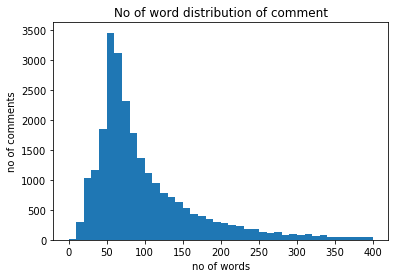

Total comments = 25000


In [20]:
totalNumWords = [len(one_sentence) for one_sentence in x_train_tokenized]
plt.hist(totalNumWords, bins = np.arange(0,410,10))
plt.xlabel("no of words")
plt.ylabel("no of comments")
plt.title("No of word distribution of comment")
plt.show()
print("Total comments =", len(x_train_tokenized))

# 2) Padding 

In [21]:
# Padding (making every comments in same length)

maxlen = 370
x_train = pad_sequences(x_train_tokenized, maxlen = maxlen)
x_test = pad_sequences(x_test_tokenized, maxlen = maxlen)

In [22]:
print('len(x_train):', len(x_train))
x_train

len(x_train): 25000


array([[   0,    0,    0, ...,    3,  316, 1356],
       [   0,    0,    0, ..., 4628, 1251, 5471],
       [   0,    0,    0, ...,  700, 1175, 5310],
       ...,
       [   0,    0,    0, ...,   10,   14,  207],
       [   0,    0,    0, ...,  218, 1903,   16],
       [   0,    0,    0, ..., 1108,  109,  350]])

# Split training and valdiation set

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=0)

# LSTM 

In [24]:
from keras.models import Sequential
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

## 1) Define model architecture & Compile

In [25]:
embed_size = 128

def Create_model ():

    model = Sequential()
    model.add(Embedding(
        input_dim = max_features,   #6000
        output_dim = embed_size,    #128
        input_length = maxlen,      #370
        trainable = False))
    
    model.add(LSTM(128, recurrent_dropout=0.1))
    model.add(Dropout(0.25))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    model.compile(
        loss="binary_crossentropy",
        optimizer='adam',
        metrics=['accuracy'])
    
    return model

In [26]:
model = Create_model()

W0902 16:42:40.784336 23980 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0902 16:42:40.803285 23980 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 16:42:40.806278 23980 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0902 16:42:41.035663 23980 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0902 16:42:41.047632 23980 de

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 370, 128)          768000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 907,905
Trainable params: 139,905
Non-trainable params: 768,000
________________________________________________________________

In [28]:
history = model.fit(x = x_train, y = y_train, epochs = 21, batch_size = 64,
                    validation_data = (x_val, y_val))

Train on 22500 samples, validate on 2500 samples
Epoch 1/21
22500/22500 [==============================] - 412s 18ms/step - loss: 0.6825 - acc: 0.5744 - val_loss: 0.6514 - val_acc: 0.6196
Epoch 2/21
22500/22500 [==============================] - 472s 21ms/step - loss: 0.6291 - acc: 0.6496 - val_loss: 0.6301 - val_acc: 0.6388
Epoch 3/21
22500/22500 [==============================] - 484s 22ms/step - loss: 0.6031 - acc: 0.6731 - val_loss: 0.6001 - val_acc: 0.6776
Epoch 4/21
22500/22500 [==============================] - 514s 23ms/step - loss: 0.5911 - acc: 0.6865 - val_loss: 0.5868 - val_acc: 0.6912
Epoch 5/21
22500/22500 [==============================] - 443s 20ms/step - loss: 0.5880 - acc: 0.6919 - val_loss: 0.5891 - val_acc: 0.6944
Epoch 6/21
22500/22500 [==============================] - 513s 23ms/step - loss: 0.5780 - acc: 0.6978 - val_loss: 0.5705 - val_acc: 0.7092
Epoch 7/21
22500/22500 [==============================] - 487s 22ms/step - loss: 0.5701 - acc: 0.7074 - val_loss: 0.5

In [29]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


# Model Evaluation (df_train)

## 1) Plot loss and accuracy

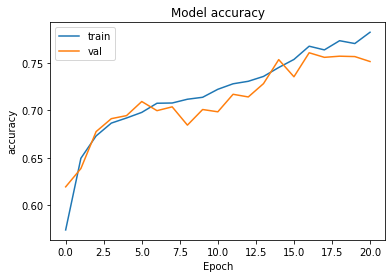

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.show()

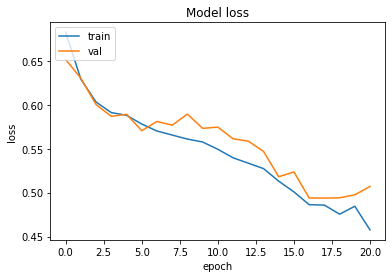

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 2) Loss and accuracy on validation set

In [32]:
score = model.evaluate(x_val, y_val)
print("loss:", score[0])
print("metric (accuracy): ", score[1])

2500/2500 [==============================] - 5s 2ms/step
loss: 0.5070103193283081
metric (accuracy):  0.7512


## 3) ROC AUC

In [33]:
y_train_pred = model.predict_classes(x_train)
y_val_pred = model.predict_classes(x_val)

In [42]:
from sklearn.metrics import roc_auc_score

print('ROC AUC (train): {0}'.format(roc_auc_score(y_train, y_train_pred)))
print('ROC AUC (val): {0}'.format(roc_auc_score(y_val, y_val_pred)))

ROC AUC (train): 0.785376227355746
ROC AUC (val): 0.7546193795227522


## 4) Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, ax, class_names, vmax=None,
                          normed=True, title='Confusion matrix'):
    matrix = confusion_matrix(y_true,y_pred)
    if normed:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    sns.heatmap(matrix, vmax=vmax, annot=True, square=True, ax=ax,
               cmap=plt.cm.Blues_r, cbar=False, linecolor='black',
               linewidths=1, xticklabels=class_names)
    ax.set_title(title, y=1.20, fontsize=16)
    #ax.set_ylabel('True labels', fontsize=12)
    ax.set_xlabel('Predicted labels', y=1.10, fontsize=12)
    ax.set_yticklabels(class_names, rotation=0)

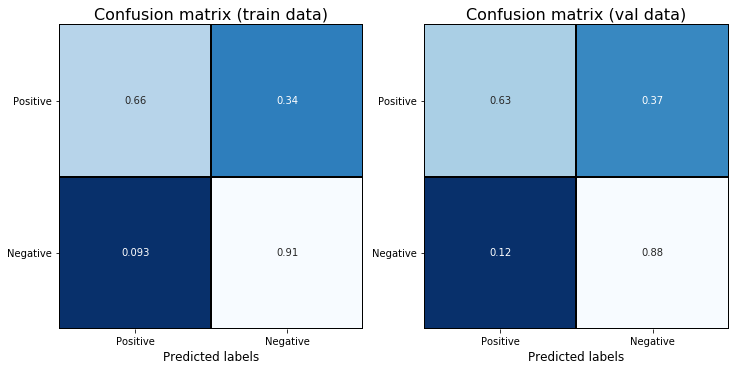

In [86]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
plot_confusion_matrix(y_train, y_train_pred, ax=axis1,
                      title='Confusion matrix (train data)',
                      class_names=['Positive', 'Negative'])

plot_confusion_matrix(y_val, y_val_pred, ax=axis2,
                      title='Confusion matrix (val data)',
                      class_names=['Positive', 'Negative'])

# Prediction (x_test)

In [35]:
y_test_pred = model.predict_classes(x_test)

In [36]:
y_test_pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [37]:
submission = pd.read_csv("./input/sampleSubmission.csv")
submission['sentiment'] = y_test_pred.astype(int)
submission.to_csv('./output/submission_words.csv', index=False)

# Save model architecture (.json) and model weights (.h5)

In [38]:
# Save model architecture (.json)

model_json = model.to_json()
with open("./model/modelarchitecture.json", "w") as json_file:
    json_file.write(model_json)

In [39]:
# Save model weights (.h5)

model.save_weights("./model/modelweights.h5")

# Plot Model png

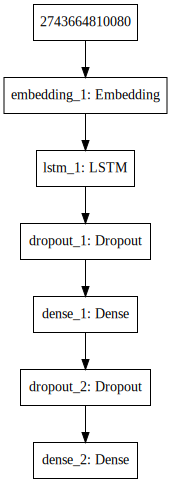

In [40]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='./model/model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))